## Efficient frontier Part II


In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
%reload_ext autoreload
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov() #The covariance matrix

In [52]:
l = ["Food","Beer","Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [53]:
cov.loc[l, l]


,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [54]:
weights = np.repeat(1/4,4) #Generate an array with 1/4 of 1 and 4 entry
print(weights)
erk.portfolio_return(weights, er[l])



[0.25 0.25 0.25 0.25]


0.19511097196038385

In [55]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

## 2 Asset Frontier

In [57]:
l = ["Games","Fin"]

In [58]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)] #List comprehension is a way to generate list

In [59]:
len(weights)

20

In [60]:
l

['Games', 'Fin']

<AxesSubplot:xlabel='Vol'>

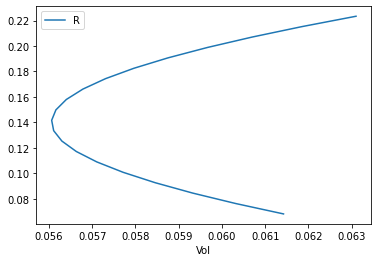

In [61]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l , l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.line(x="Vol", y="R")

In [62]:
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

<AxesSubplot:xlabel='Volatility'>

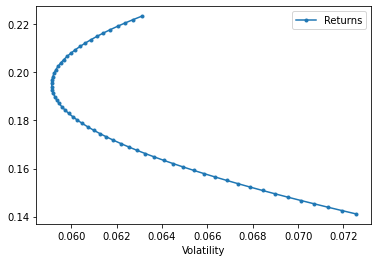

In [63]:
l = ["Fin", "Beer"]
%reload_ext autoreload
erk.plot_ef2(60, er[l].values, cov.loc[l, l])